In [1]:
from netCDF4 import Dataset as ncfile
import pickle
import math
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import cmocean
import numpy as np
import numpy.ma as ma

import os 
import xarray as xr
import pandas as pd
import pyproj

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cpf
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from datetime import datetime, timedelta

import LambertLabels

/home/maltem/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Model experiments
arch_dir='/lustre/storeB/users/maltem/Arctic/BasicAA/'
#SIC_amsr = xr.open_mfdataset(arch_dir+'SIC.basic_aa_amsr2_sic.Mar2019.nc')
#SIC_mult = xr.open_mfdataset(arch_dir+'SIC.basic_aa_new_sic.Mar2019.nc')

# Model experiments
arch_dir='../../python/data/basicAA/'
GRIDdummy = xr.open_mfdataset(arch_dir+'mean.diff.SFX_ICE_THK.basic_aa_new-amsr2.Mar2019.nc')
alat=np.array(GRIDdummy['latitude'])
alon=np.array(GRIDdummy['longitude'])

icechart = xr.open_mfdataset('ice_conc_svalbard_202403271500.nc')
clat = np.array(icechart['lat'])
clon = np.array(icechart['lon'])

In [3]:
np.shape(np.array(icechart.ice_concentration))

(1, 2980, 3812)

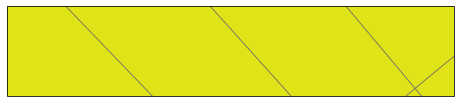

In [6]:
map_proj = ccrs.LambertConformal(central_latitude=77.5,
                                 central_longitude=-25,
                                 standard_parallels=(77.5,77.5))
PRJ = pyproj.Proj(map_proj.proj4_init)
x0,y0 = PRJ(alon[380,140],alat[380,140])
x1,y1 = PRJ(alon[670,490],alat[670,490])
LAND_highres = cpf.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', \
                                       facecolor = 'darkgrey', linewidth=.1)
sizefont = 18
ice_cmap = colors.ListedColormap(['none','grey'])
ice_levels = np.linspace(0,1,3)
ice_norm = BoundaryNorm(ice_levels, 31)
xticks = [-20,-10, -8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,50,60,70,80,90,100,110,120]
yticks = [60,65,70, 75,76,77,78,79,80,81,82,83, 85,90]

fig, axs = plt.subplots(1,1, figsize=(8,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.3)


Lat = [78.2022, 77.6873, 77.0002, 78.0625, 78.9218, 78.2278, 78.6557, 78.2453, 76.4733, 80.0555,
       74.5035,  71.0937, 71.3112, 70.7057, 71.0888, 70.2452,
       78.2508,  76.5097, 80.6518, 78.9067, 80.1035]
Lon = [15.831,  14.7578, 15.5353, 13.6192, 11.9325, 15.378,  16.3603, 15.5015, 16.5428, 16.2433,
        18.998,   23.9817,  22.25,  30.07,   28.217,  19.4997,
       22.8225,  25.0133, 25.0048, 28.8883, 31.4585]


# Surface Temperature  -----------------------------------------------------
#----

levels = np.linspace(0.,100 , 31)  # color bar
lticks =np.arange(0, 100+10, 10)
norm = BoundaryNorm(levels, 256)
colorscale = 'cmo.ice'


# (a)  -------
axs = plt.subplot(1,1,1, projection = map_proj)
axs.set_title('', fontsize = sizefont)

axs.pcolormesh(clon,clat,np.squeeze(np.array(icechart.ice_concentration)), transform = ccrs.PlateCarree())


dx=18

for j in range(265,360,dx):
    i=range(570,660,dx)
    axs.scatter(alon[i,j],alat[i,j],color='r',marker='o',transform = ccrs.PlateCarree())
# Storfjorden
#for j in range(255,310,dx):
#    i=range(500,550,dx)
#    axs.scatter(alon[i,j],alat[i,j],color='r',marker='o',transform = ccrs.PlateCarree())

axs.add_feature(LAND_highres, zorder = 1, alpha = 1.0)

axs.set_xlim(x0,x1)
axs.set_ylim(y0,y1)
# Make Lambert Grid Lines:
fig.canvas.draw() # must call this for labeling to work properly on outer boundary of figure.
axs.gridlines(xlocs=xticks, ylocs=yticks,color='dimgrey')
axs.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
axs.yaxis.set_major_formatter(LATITUDE_FORMATTER)
#LambertLabels.lambert_xticks(axs, xticks)
#LambertLabels.lambert_yticks(axs, yticks)

fig.savefig('icechartsaf_seaiceconcentration_case.png')


In [8]:
alon[0,0]

-17.956999587953376

In [11]:
alat[600,0]

82.48870949558244